In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as Xgb
from sklearn.svm import SVC
import matplotlib.pyplot as plt


In [18]:
class FaultDataProcessor:
    def __init__(self, file_path):
        self.data = pd.read_csv(file_path)
        self.clean_data()
    
    def clean_data(self):
        self.data['Fault_Type'] = self.data['G'].astype('str') + self.data['C'].astype('str') + self.data['B'].astype('str') + self.data['A'].astype('str')
        fault_mapping = {
            '0000': 'NO Fault',
            '1001': 'Line A to Ground Fault',
            '0110': 'Line B to Line C Fault',
            '1011': 'Line A Line B to Ground Fault',
            '0111': 'Line A Line B Line C',
            '1111': 'Line A Line B Line C to Ground Fault'
        }
        self.data['Fault_Type'] = self.data['Fault_Type'].map(fault_mapping)

    def get_data(self):
        return self.data


In [21]:
processor = FaultDataProcessor('C:\\Users\\shoaib.ahmad\\Desktop\\power system\\Electrical-Faults-Detection-and-Classification-using-Machine-Learning-main\\classData.csv')
data = processor.get_data()
data.shape
data.describe


<bound method NDFrame.describe of       G  C  B  A          Ia          Ib          Ic        Va        Vb  \
0     1  0  0  1 -151.291812   -9.677452   85.800162  0.400750 -0.132935   
1     1  0  0  1 -336.186183  -76.283262   18.328897  0.312732 -0.123633   
2     1  0  0  1 -502.891583 -174.648023  -80.924663  0.265728 -0.114301   
3     1  0  0  1 -593.941905 -217.703359 -124.891924  0.235511 -0.104940   
4     1  0  0  1 -643.663617 -224.159427 -132.282815  0.209537 -0.095554   
...  .. .. .. ..         ...         ...         ...       ...       ...   
7856  0  0  0  0  -66.237921   38.457041   24.912239  0.094421 -0.552019   
7857  0  0  0  0  -65.849493   37.465454   25.515675  0.103778 -0.555186   
7858  0  0  0  0  -65.446698   36.472055   26.106554  0.113107 -0.558211   
7859  0  0  0  0  -65.029633   35.477088   26.684731  0.122404 -0.561094   
7860  0  0  0  0  -64.598401   34.480799   27.250065  0.131669 -0.563835   

            Vc              Fault_Type  
0    -0.2678

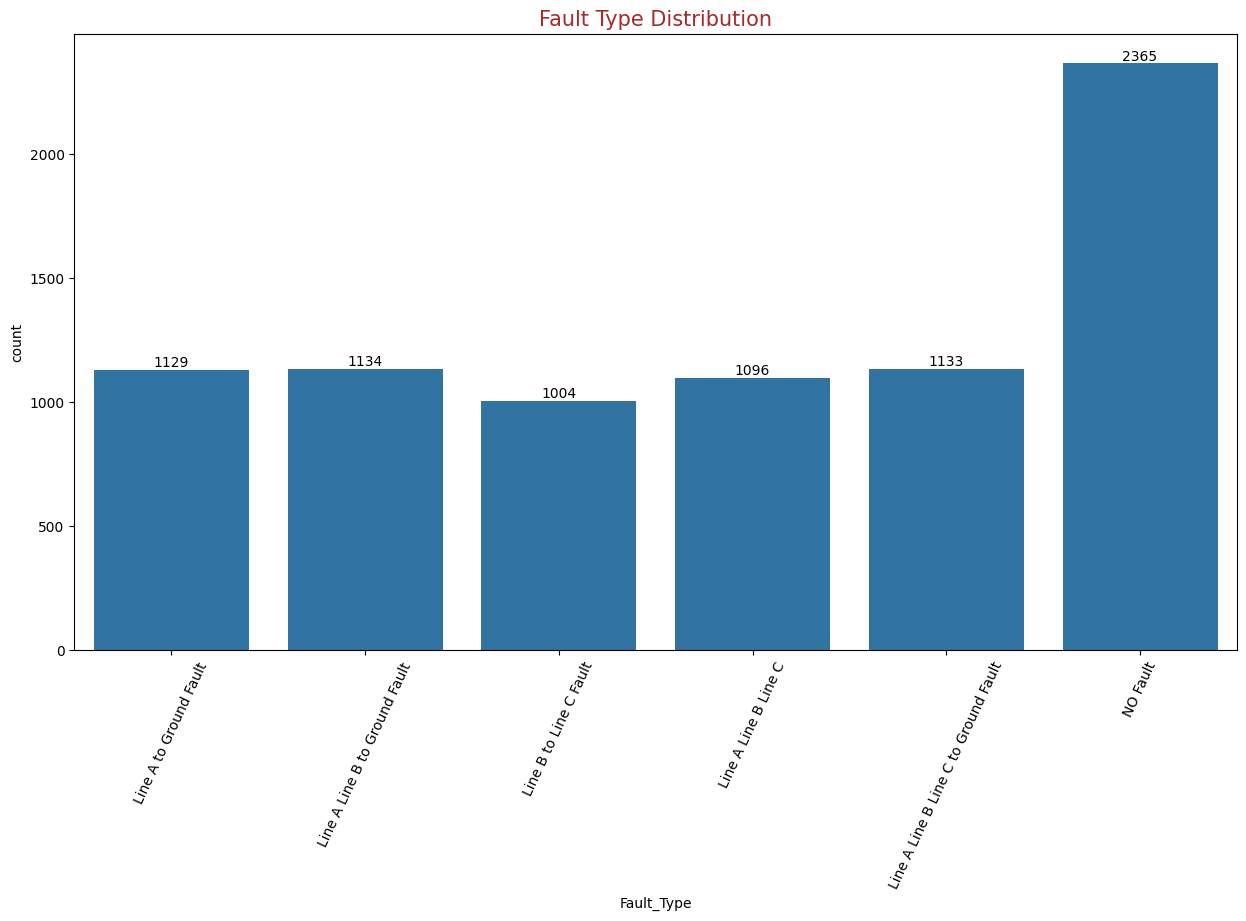

In [22]:
class FaultVisualization:
    @staticmethod
    def plot_fault_distribution(data):
        plt.figure(figsize=(15, 8))
        ax = sns.countplot(x='Fault_Type', data=data)
        ax.bar_label(ax.containers[0])
        plt.xticks(rotation=65)
        plt.title("Fault Type Distribution", fontsize=15, color='Brown')
        plt.show()

FaultVisualization.plot_fault_distribution(data)


In [23]:
X = data.drop(['Fault_Type'], axis=1)
y = data['Fault_Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=21)


In [24]:
class ModelTrainer:
    def __init__(self, X_train, X_test, y_train, y_test):
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        self.results = []
    
    def train_and_evaluate(self, model, model_name):
        model.fit(self.X_train, self.y_train)
        y_pred = model.predict(self.X_test)
        accuracy = round(accuracy_score(self.y_test, y_pred) * 100, 2)
        
        print(f"{model_name} Model Accuracy: {accuracy}%")
        print("Classification Report:")
        print(classification_report(self.y_test, y_pred))
        disp = ConfusionMatrixDisplay(confusion_matrix(self.y_test, y_pred), display_labels=np.unique(self.y_test))
        disp.plot(cmap='Blues')
        plt.title(f'{model_name} Confusion Matrix')
        plt.show()
        
        self.results.append((model_name, accuracy))
    
    def compare_models(self):
        results_df = pd.DataFrame(self.results, columns=["Model", "Accuracy"])
        print(results_df.sort_values(by='Accuracy', ascending=False))


Logistic Regression Model Accuracy: 89.57%
Classification Report:
                                      precision    recall  f1-score   support

                Line A Line B Line C       0.56      1.00      0.72       213
Line A Line B Line C to Ground Fault       1.00      1.00      1.00       231
       Line A Line B to Ground Fault       1.00      1.00      1.00       248
              Line A to Ground Fault       1.00      1.00      1.00       227
              Line B to Line C Fault       1.00      0.17      0.29       198
                            NO Fault       1.00      1.00      1.00       456

                            accuracy                           0.90      1573
                           macro avg       0.93      0.86      0.84      1573
                        weighted avg       0.94      0.90      0.87      1573



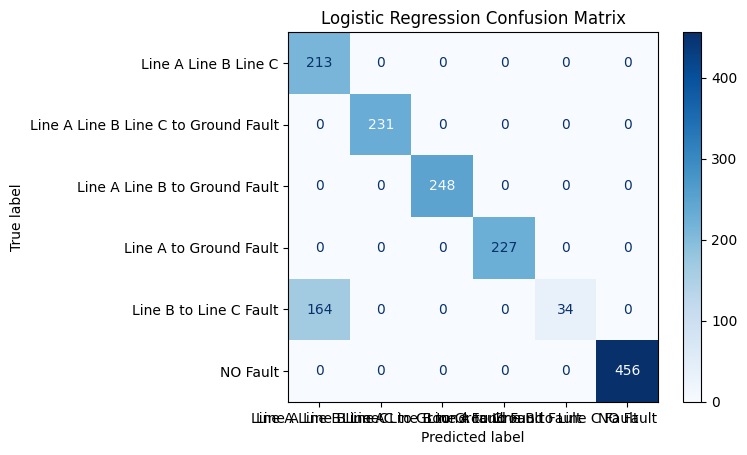

Decision Tree Model Accuracy: 100.0%
Classification Report:
                                      precision    recall  f1-score   support

                Line A Line B Line C       1.00      1.00      1.00       213
Line A Line B Line C to Ground Fault       1.00      1.00      1.00       231
       Line A Line B to Ground Fault       1.00      1.00      1.00       248
              Line A to Ground Fault       1.00      1.00      1.00       227
              Line B to Line C Fault       1.00      1.00      1.00       198
                            NO Fault       1.00      1.00      1.00       456

                            accuracy                           1.00      1573
                           macro avg       1.00      1.00      1.00      1573
                        weighted avg       1.00      1.00      1.00      1573



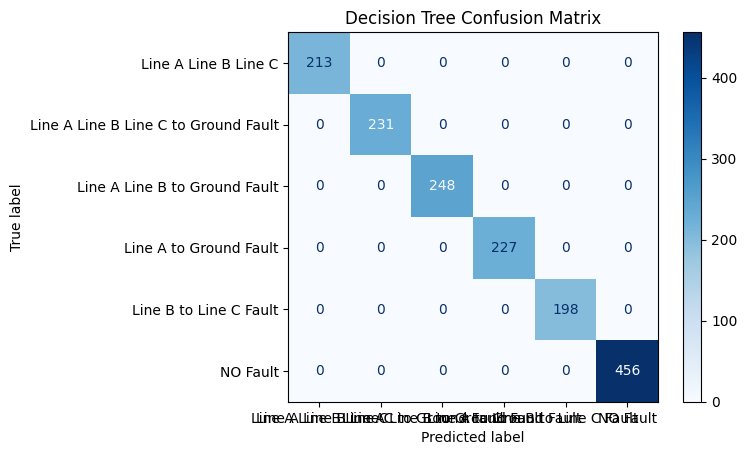

Random Forest Model Accuracy: 100.0%
Classification Report:
                                      precision    recall  f1-score   support

                Line A Line B Line C       1.00      1.00      1.00       213
Line A Line B Line C to Ground Fault       1.00      1.00      1.00       231
       Line A Line B to Ground Fault       1.00      1.00      1.00       248
              Line A to Ground Fault       1.00      1.00      1.00       227
              Line B to Line C Fault       1.00      1.00      1.00       198
                            NO Fault       1.00      1.00      1.00       456

                            accuracy                           1.00      1573
                           macro avg       1.00      1.00      1.00      1573
                        weighted avg       1.00      1.00      1.00      1573



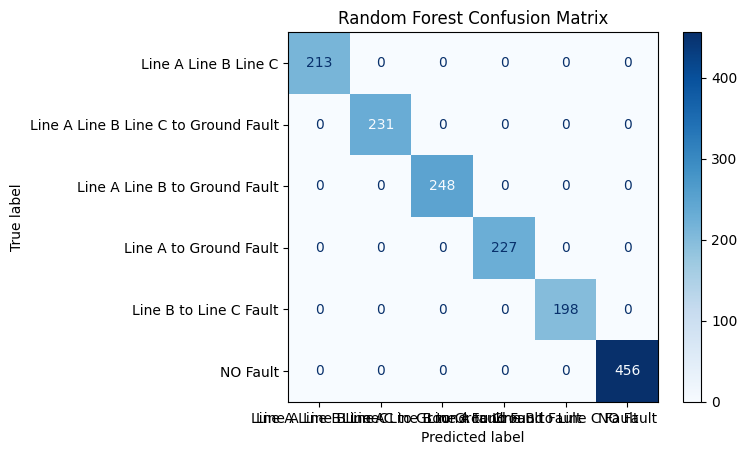

In [26]:
trainer = ModelTrainer(X_train, X_test, y_train, y_test)

trainer.train_and_evaluate(LogisticRegression(), "Logistic Regression")
trainer.train_and_evaluate(DecisionTreeClassifier(), "Decision Tree")
trainer.train_and_evaluate(RandomForestClassifier(n_estimators=100), "Random Forest")
#trainer.train_and_evaluate(Xgb.XGBClassifier(), "XGBoost")
#trainer.train_and_evaluate(SVC(), "Support Vector Machine")


In [27]:
trainer.compare_models()


                 Model  Accuracy
1        Decision Tree    100.00
2        Random Forest    100.00
0  Logistic Regression     89.57
